# https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook

# https://chtseng.wordpress.com/2017/12/24/kaggle-titanic%E5%80%96%E5%AD%98%E9%A0%90%E6%B8%AC-1/

# https://chtseng.wordpress.com/2017/12/24/kaggle-titanic%E5%80%96%E5%AD%98%E9%A0%90%E6%B8%AC-1/

# Import libraries

In [1]:
#a "PassengerId" column containing the IDs of each passenger from test.csv.
#a "Survived" column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv(r'/Users/lih-anhsu/Desktop/Python/kaggle_titanic_ML/train.csv')

test_df = pd.read_csv(r'/Users/lih-anhsu/Desktop/Python/kaggle_titanic_ML/test.csv')

# Data exploration

In [4]:
print(train_df.shape)

print(test_df.shape)

(891, 12)
(418, 11)


In [5]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## Distribution of population 

### Pclass population count

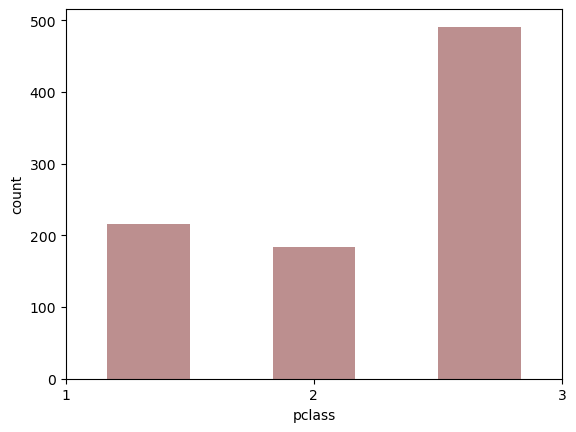

In [7]:
# Adjusted bar size
bar_width = 0.5

plt.hist(train_df['Pclass'], stacked = False, bins = 3, rwidth = bar_width, color = '#BC8F8F')

#Add label
plt.xlabel('pclass')

plt.ylabel('count')


plt.xticks([1, 2, 3]) #adjust the x-scale to only display 1, 2, and 3 without decimals

plt.show()

### Age, sex population count

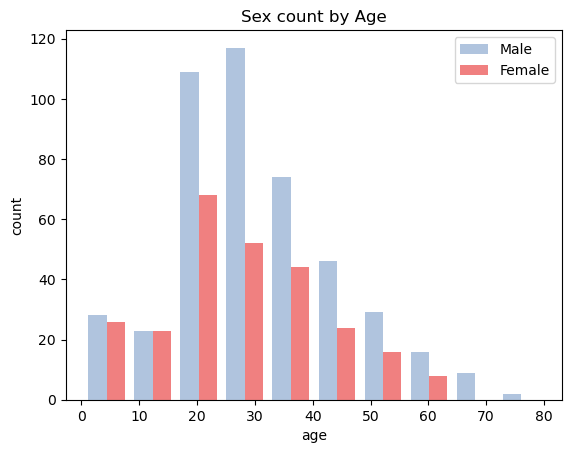

In [8]:
# filter by sex and for age column, age groupby sex
male_age = train_df[train_df['Sex'] == 'male']['Age']

female_age = train_df[train_df['Sex'] == 'female']['Age']

# histogram with sex as x-axis and age as y-axis
#creates separate histograms for each category without stacking them on top of each other.
plt.hist([male_age, female_age], stacked = False, color = ['#B0C4DE', '#f08080'], bins = 10, label = ['Male', 'Female']) 

#Add the labels
plt.xlabel('age')

plt.ylabel('count')

plt.title('Sex count by Age')

plt.legend()

plt.show()

### Name_title population count

In [9]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [10]:
# the title is at the second word, so in here using split to get the title
# by testing, the order of Name col is: given name, title, last name, so idex should be [1] for title
title = train_df['Name'].str.split().str[1]

title

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Name, Length: 891, dtype: object

In [11]:
list(title.unique())

['Mr.',
 'Mrs.',
 'Miss.',
 'Master.',
 'Planke,',
 'Don.',
 'Rev.',
 'Billiard,',
 'der',
 'Walle,',
 'Dr.',
 'Pelsmaeker,',
 'Mulder,',
 'y',
 'Steen,',
 'Carlo,',
 'Mme.',
 'Impe,',
 'Ms.',
 'Major.',
 'Gordon,',
 'Messemaeker,',
 'Mlle.',
 'Col.',
 'Capt.',
 'Velde,',
 'the',
 'Shawah,',
 'Jonkheer.',
 'Melkebeke,',
 'Cruyssen,']

In [12]:
title_count = title.value_counts().to_frame().reset_index()

title_count = title_count.rename(columns={'index': 'title', 'Name': 'count'})

title_count

,title,count
0,Mr.,502
1,Miss.,179
2,Mrs.,121
3,Master.,40
4,Dr.,7
5,Rev.,6
6,y,4
7,"Planke,",3
8,"Impe,",3
9,"Gordon,",2


<function matplotlib.pyplot.show(close=None, block=None)>

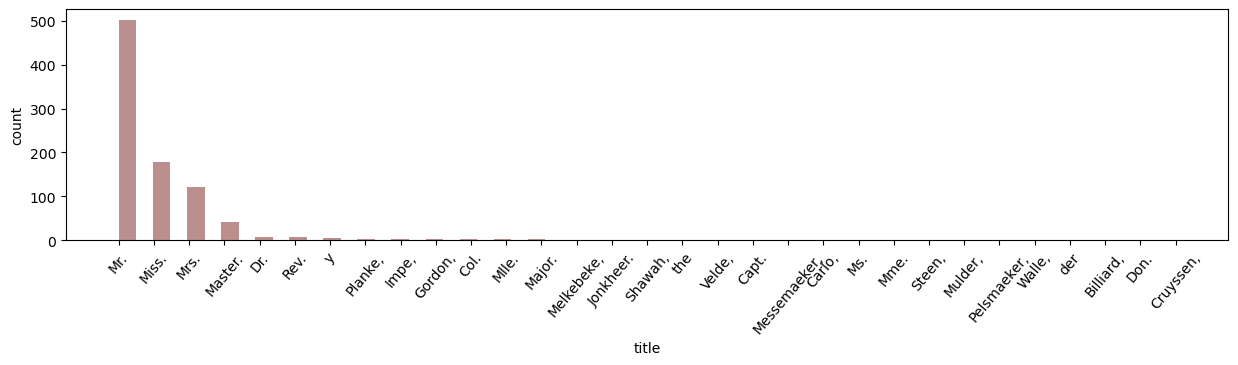

In [13]:
# figure size
plt.figure(figsize=(15, 3))

# assign the first column to x
x_axis_title = title_count.iloc[:, 0]  

# assign the second column to y
y_axis_title = title_count.iloc[:, 1]  

# Adjusted bar size
bar_width = 0.5

plt.hist(x_axis_title, bins = len(x_axis_title), weights = y_axis_title, width = bar_width, color = '#BC8F8F')

#Add label
plt.xlabel('title')

plt.ylabel('count')

plt.xticks(rotation = 50)# make x axis readable

plt.show

In here, the top 6 since it's frequntly used titles (and make sense) as a feature to evalue them with survival chance. Note: Rev for Reverend.

### Sibsp

In [14]:
SibSp_count = train_df['SibSp'].value_counts().to_frame().reset_index()

SibSp_count = SibSp_count.rename(columns = {'index': 'SibSp_num', 'SibSp': 'count'})

SibSp_count

,SibSp_num,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


<function matplotlib.pyplot.show(close=None, block=None)>

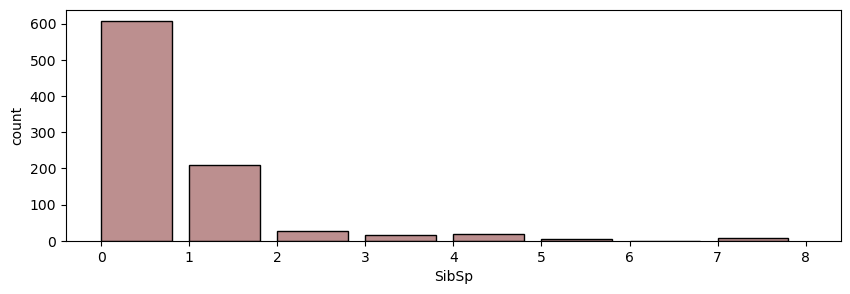

In [15]:
# figure size
plt.figure(figsize=(10, 3))

# assign the first column to x
x_axis_sibsp = SibSp_count.iloc[:, 0]  

# assign the second column to y
y_axis_sibsp = SibSp_count.iloc[:, 1]  

# Adjusted bar size
bar_width = 0.8

plt.hist(x_axis_sibsp, bins = 8, width = bar_width, weights = y_axis_sibsp,  align='mid', edgecolor='black', color = '#BC8F8F')

#Add label
plt.xlabel('SibSp')

plt.ylabel('count')

plt.show

Most of the passengers have less than 2 sib or sp

### Parch

In [16]:
Parch_count = train_df['Parch'].value_counts().to_frame().reset_index()

Parch_count = Parch_count.rename(columns = {'index': 'Parch_num', 'Parch': 'count'})

Parch_count

,Parch_num,count
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1


<function matplotlib.pyplot.show(close=None, block=None)>

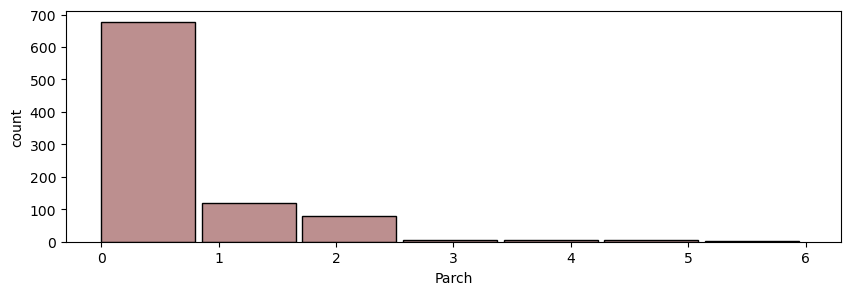

In [17]:
# figure size
plt.figure(figsize=(10, 3))

# assign the first column to x
x_axis_Parch = Parch_count.iloc[:, 0]  

# assign the second column to y
y_axis_Parch = Parch_count.iloc[:, 1]  

# Adjusted bar size
bar_width = 0.8

plt.hist(x_axis_Parch, bins = 7, width = bar_width, weights = y_axis_Parch,  align='mid', edgecolor='black', color = '#BC8F8F')

#Add label
plt.xlabel('Parch')

plt.ylabel('count')

plt.show

Most of the passengers have less than 2 parents or chidren

### Fare

In [18]:
Fare_count = train_df['Fare'].value_counts().to_frame().reset_index()

Fare_count = Fare_count.rename(columns = {'index': 'Fare', 'Fare': 'count'})

Fare_count

,Fare,count
0,8.0500,43
1,13.0000,42
2,7.8958,38
3,7.7500,34
4,26.0000,31
...,...,...
243,35.0000,1
244,28.5000,1
245,6.2375,1
246,14.0000,1


<function matplotlib.pyplot.show(close=None, block=None)>

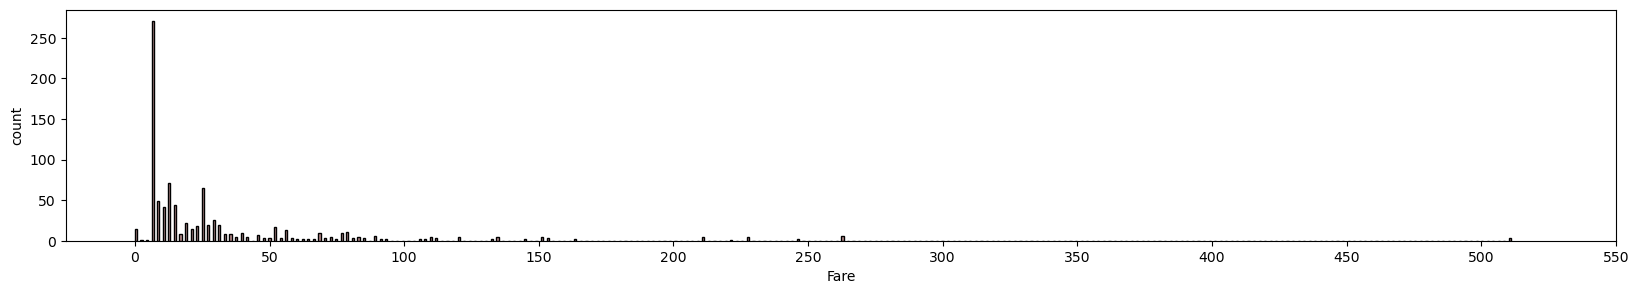

In [19]:
# figure size
plt.figure(figsize=(20, 3))

# assign the first column to x
x_axis_fare = Fare_count.iloc[:, 0]  

# assign the second column to y
y_axis_fare = Fare_count.iloc[:, 1]  

# Adjusted bar size
bar_width = 0.8

plt.hist(x_axis_fare, bins = len(x_axis_fare), width = bar_width, weights = y_axis_fare,  align='mid', edgecolor='black', color = '#BC8F8F')

#Add label
plt.xlabel('Fare')

plt.ylabel('count')

plt.xticks([0,50,100,150,200,250,300,350,400,450,500,550])

plt.show

Most of the ticket prices are below 50, 50-100 is the second, 100-150 owns the 3rd population, then few of the passengers bought >200 & >500

### Cabin

In [20]:
cabin_count = train_df['Cabin'].value_counts().to_frame().reset_index()

cabin_count = cabin_count.rename(columns = {'index': 'cabin', 'Cabin': 'count'})

cabin_count

,cabin,count
0,B96 B98,4
1,G6,4
2,C23 C25 C27,4
3,C22 C26,3
4,F33,3
...,...,...
142,E34,1
143,C7,1
144,C54,1
145,E36,1


<function matplotlib.pyplot.show(close=None, block=None)>

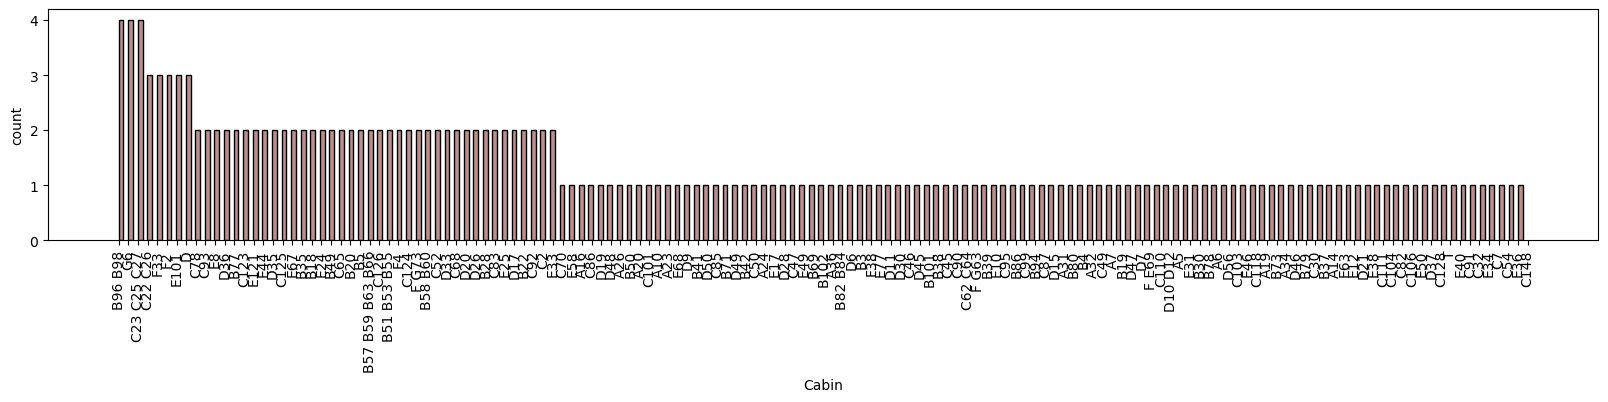

In [21]:
# figure size
plt.figure(figsize=(20, 3))

# assign the first column to x
x_axis_cabin = cabin_count.iloc[:, 0]  

# assign the second column to y
y_axis_cabin = cabin_count.iloc[:, 1]  

# Adjusted bar size
bar_width = 0.5

plt.hist(x_axis_cabin, bins = len(x_axis_cabin), width = bar_width, weights = y_axis_cabin,  align='mid', edgecolor='black', color = '#BC8F8F')

#Add label
plt.xlabel('Cabin')

plt.ylabel('count')

plt.xticks(rotation = 90)

plt.show

In [22]:
cabin_pclass_count = train_df[['Cabin', 'Pclass']]

cabin_pclass_count = cabin_pclass_count.fillna('-')

cabin_pclass_count

,Cabin,Pclass
0,-,3
1,C85,1
2,-,3
3,C123,1
4,-,3
...,...,...
886,-,2
887,B42,1
888,-,3
889,C148,1


In [23]:
cabin_pclass_count['Cabin_cate'] = cabin_pclass_count['Cabin'].str[0]

cabin_pclass_count

,Cabin,Pclass,Cabin_cate
0,-,3,-
1,C85,1,C
2,-,3,-
3,C123,1,C
4,-,3,-
...,...,...,...
886,-,2,-
887,B42,1,B
888,-,3,-
889,C148,1,C


In [24]:
cabin_pclass_count.groupby('Pclass')['Cabin_cate'].value_counts().to_frame()

Cabin_cate
Pclass Cabin_cate            
1      C                   59
       B                   47
       -                   40
       D                   29
       E                   25
       A                   15
       T                    1
2      -                  168
       F                    8
       D                    4
       E                    4
3      -                  479
       F                    5
       G                    4
       E                    3

It shows most of the passengers stay one person per cabin, then two per cabin.
As for cabin_cate, the third class loss the data the most. 
p1: c is the most, p2: f is the most, p3 f is the most

### Embarked

In [25]:
embark_count = train_df['Embarked'].value_counts().to_frame().reset_index()

embark_count = embark_count.rename(columns = {'index': 'embarked', 'Embarked': 'count'})

embark_count

,embarked,count
0,S,644
1,C,168
2,Q,77


<function matplotlib.pyplot.show(close=None, block=None)>

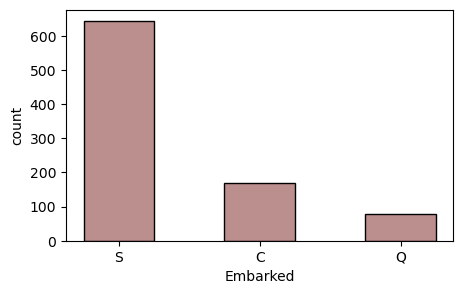

In [26]:
# figure size
plt.figure(figsize=(5, 3))

# assign the first column to x
x_axis_embark = embark_count.iloc[:, 0]  

# assign the second column to y
y_axis_embark = embark_count.iloc[:, 1]  

# Adjusted bar size
bar_width = 0.5

plt.bar(x_axis_embark, height = y_axis_embark, width = bar_width, align='center', edgecolor='black', color = '#BC8F8F')

#Add label
plt.xlabel('Embarked')

plt.ylabel('count')

plt.show

## Check features that may affect survival chance

### Sex

In [27]:
sex_survived = train_df[['Sex', 'Survived']].groupby(train_df['Sex']).mean().sort_values(by='Survived', ascending=True).reset_index()

sex_survived

,Sex,Survived
0,male,0.188908
1,female,0.742038


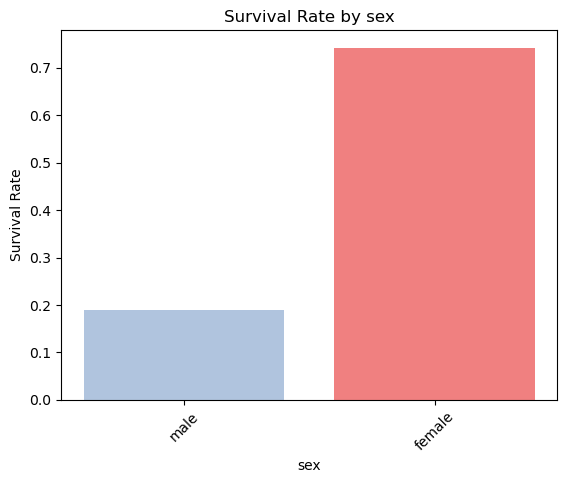

In [28]:
#  bar chart
# colors for the bars
colors = ['#B0C4DE', '#f08080']

plt.bar(sex_survived['Sex'], sex_survived['Survived'], color = colors)

# Adding labels and title
plt.xlabel('sex')

plt.ylabel('Survival Rate')

plt.title('Survival Rate by sex')

# Rotating x-axis labels for better readability

plt.xticks(rotation=45)

# Displaying the chart
plt.show()

Females are more likely to survive

### Age
* fractional if less than 1. If the age is estimated, is it in the form of xx.5

In [29]:
# Group 'Age' column into 10 groups
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=8)

group_age_survived = train_df[['Age_Group', 'Survived']].groupby(train_df['Age_Group']).mean().sort_values(by='Age_Group', ascending=True)

group_age_survived

,Survived
Age_Group,
"(0.34, 10.368]",0.593750
"(10.368, 20.315]",0.382609
"(20.315, 30.263]",0.365217
"(30.263, 40.21]",0.445161
"(40.21, 50.158]",0.383721
"(50.158, 60.105]",0.404762
"(60.105, 70.052]",0.235294
"(70.052, 80.0]",0.200000


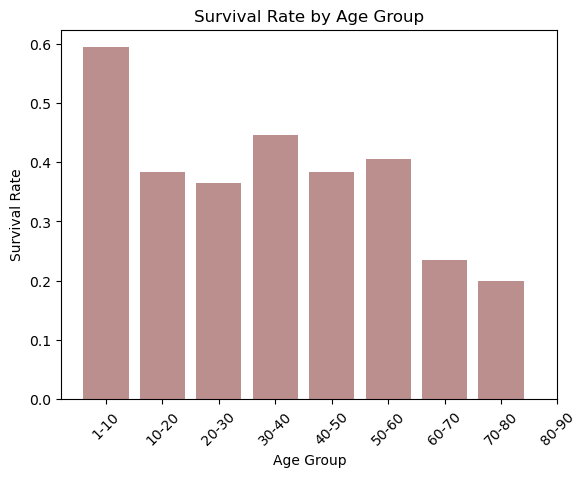

In [30]:
#  bar chart
plt.bar(group_age_survived.index.astype(str), group_age_survived['Survived'], color = '#BC8F8F')

# Adding labels and title
plt.xlabel('Age Group')

plt.ylabel('Survival Rate')

plt.title('Survival Rate by Age Group')

# Rotating x-axis labels for better readability
age_groups = ['1-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

plt.xticks(range(len(age_groups)), age_groups, rotation=45)

plt.xticks(rotation=45)

# Displaying the chart
plt.show()

Children under 8 and elderly abouve 72 have higher survival chance, which make sense when retreating people to the lifeboat.

In [31]:
age_sex_survived  = train_df[['Sex', 'Age', 'Survived']]

age_sex_survived


,Sex,Age,Survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0
...,...,...,...
886,male,27.0,0
887,female,19.0,1
888,female,NaN,0
889,male,26.0,1


### Age & Sex

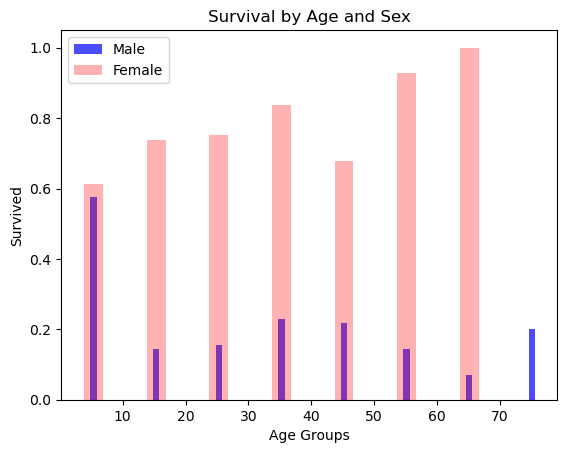

In [32]:
# Grouping the data by age and sex and calculating the mean survival rate
each_10_age = pd.cut(age_sex_survived['Age'], bins = 8)# change into eaxh 10 yr age

grouped_sex_age = age_sex_survived.groupby([each_10_age, 'Sex'])['Survived'].mean().reset_index()

# Filtering out the rows with missing values (NaN) in 'Age' column
grouped_sex_age = grouped_sex_age.dropna(subset = ['Age'])

# Extracting the midpoint of each age interval
grouped_sex_age['AgeMidpoint'] = grouped_sex_age['Age'].apply(lambda x: (x.left + x.right) / 2)

# Separate the data by sex
male_data = grouped_sex_age[grouped_sex_age['Sex'] == 'male']

female_data = grouped_sex_age[grouped_sex_age['Sex'] == 'female']

# Sorting the data by age
male_data = male_data.sort_values('AgeMidpoint')

female_data = female_data.sort_values('AgeMidpoint')

# Plotting the bar chart for males
plt.bar(male_data['AgeMidpoint'], male_data['Survived'], color = 'blue', label = 'Male', width = 1, alpha = 0.7)

# Plotting the bar chart for females
plt.bar(female_data['AgeMidpoint'], female_data['Survived'], color = 'red', label = 'Female', width = 3, alpha = 0.3)

# Adding labels and title
plt.xlabel('Age Groups')

plt.ylabel('Survived')

plt.title('Survival by Age and Sex')

plt.legend()

# Displaying the plot
plt.show()


### SibSp
* of siblings / spouses aboard the Titanic	

In [33]:
SibSp_survived = train_df.groupby('SibSp')['Survived'].mean().sort_values(ascending=True)

SibSp_survived = SibSp_survived.to_frame()

SibSp_survived

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


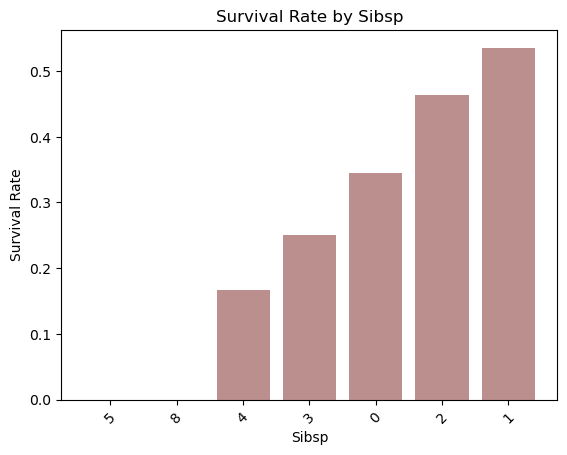

In [34]:
#  bar chart
plt.bar(SibSp_survived.index.astype(str), SibSp_survived['Survived'], color = '#BC8F8F')

# Adding labels and title
plt.xlabel('Sibsp')

plt.ylabel('Survival Rate')

plt.title('Survival Rate by Sibsp')

# Rotating x-axis labels for better readability

plt.xticks(rotation=45)

# Displaying the chart
plt.show()

It shows the less siblings/spouse, the higher chance for survival

### Parch
* of parents / children aboard the Titanic
* Some children travelled only with a nanny, therefore parch=0 for them.

In [35]:
Parch_survived = train_df.groupby('Parch')['Survived'].mean().sort_values(ascending=True)

Parch_survived = Parch_survived.to_frame()

Parch_survived

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


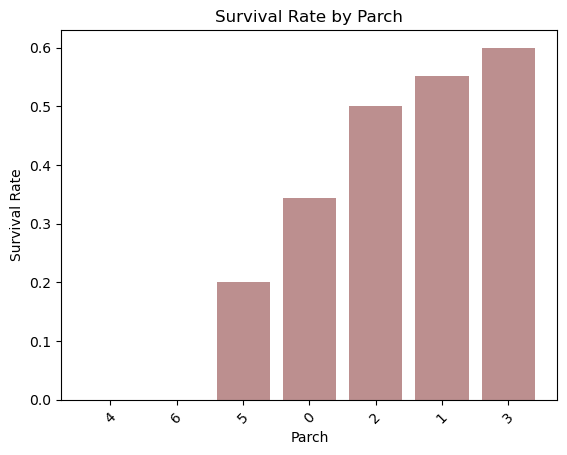

In [36]:
#  bar chart
plt.bar(Parch_survived.index.astype(str), Parch_survived['Survived'], color = '#BC8F8F')

# Adding labels and title
plt.xlabel('Parch')

plt.ylabel('Survival Rate')

plt.title('Survival Rate by Parch')

# Rotating x-axis labels for better readability

plt.xticks(rotation=45)

# Displaying the chart
plt.show()

It shows parent/children = 3 has the most survival chance, which doesn't provide any useful info 

### Fare
* Passenger fare

In [37]:
Fare_survived = train_df.groupby('Fare')['Survived'].mean().sort_values(ascending=True).reset_index()

Fare_survived

,Fare,Survived
0,8.7125,0.0
1,32.3208,0.0
2,11.5000,0.0
3,33.5000,0.0
4,34.0208,0.0
...,...,...
243,32.5000,1.0
244,12.0000,1.0
245,12.2875,1.0
246,8.1125,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

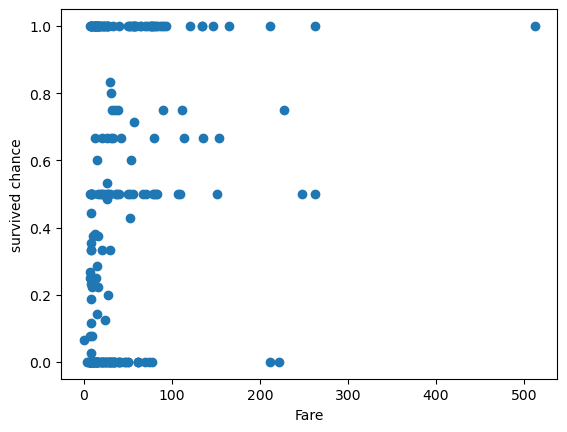

In [38]:
x = Fare_survived.iloc[:,0]

y = Fare_survived.iloc[:,1]

plt.scatter(x, y)

#Add label
plt.xlabel('Fare')

plt.ylabel('survived chance')

plt.show

In [39]:
# above plot is hard to tell the story, let's try grouping fare into ten groups
train_df['Fare_group'] = pd.cut(train_df['Fare'], bins=10)

train_df[['Fare_group', 'Survived']].groupby(train_df['Fare_group']).mean().sort_values(by='Fare_group', ascending=True)


,Survived
Fare_group,
"(-0.512, 51.233]",0.318306
"(51.233, 102.466]",0.660377
"(102.466, 153.699]",0.741935
"(153.699, 204.932]",1.000000
"(204.932, 256.165]",0.636364
"(256.165, 307.398]",0.666667
"(307.398, 358.63]",NaN
"(358.63, 409.863]",NaN
"(409.863, 461.096]",NaN


The Fare_group shows the cheapeat fare has the lowest survival chance

### Cabin, pclass
* Cabin number
* Ticket class, a proxy for socio-economic status (SES) 1 = 1st (upper), 2 = 2nd (middle), 3 = 3rd (lower)

Keep letter only in cabin

In [40]:
train_df['Cabin'] = train_df['Cabin'].str[0]

In [41]:
train_df['Cabin'] = train_df['Cabin'].fillna('-')

In [42]:
cabin_class_survived = train_df[['Cabin','Pclass', 'Survived']]

cabin_class_survived

,Cabin,Pclass,Survived
0,-,3,0
1,C,1,1
2,-,3,1
3,C,1,1
4,-,3,0
...,...,...,...
886,-,2,0
887,B,1,1
888,-,3,0
889,C,1,1


In [43]:
cabin_class_survived[['Cabin', 'Survived']].groupby(cabin_class_survived['Cabin']).mean().sort_values(by='Survived', ascending=True)

,Survived
Cabin,
T,0.000000
-,0.299854
A,0.466667
G,0.500000
C,0.593220
F,0.615385
B,0.744681
E,0.750000
D,0.757576


In [44]:
cabin_class_survived[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=True)

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [45]:
cabin_class_survived.groupby('Pclass')['Cabin'].value_counts().to_frame()

Cabin
Pclass Cabin       
1      C         59
       B         47
       -         40
       D         29
       E         25
       A         15
       T          1
2      -        168
       F          8
       D          4
       E          4
3      -        479
       F          5
       G          4
       E          3

plot the count of each Cabin value within each Pclass

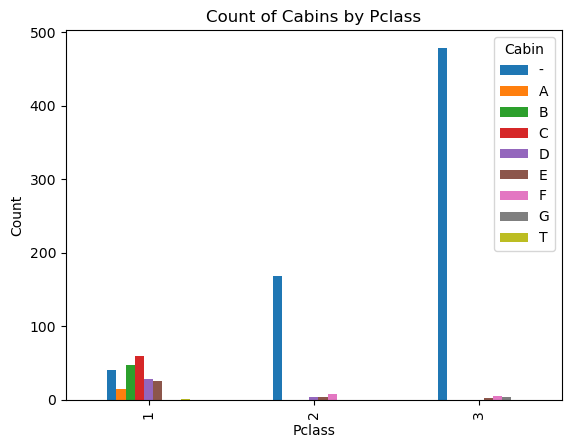

In [46]:
cabin_counts = cabin_class_survived.groupby('Pclass')['Cabin'].value_counts().unstack()

# Plotting the stacked bar chart
cabin_counts.plot(kind='bar', stacked=False)

# Adding labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Count of Cabins by Pclass')

# Displaying the chart
plt.show()


Calculating the survival rate by Cabin and Pclass

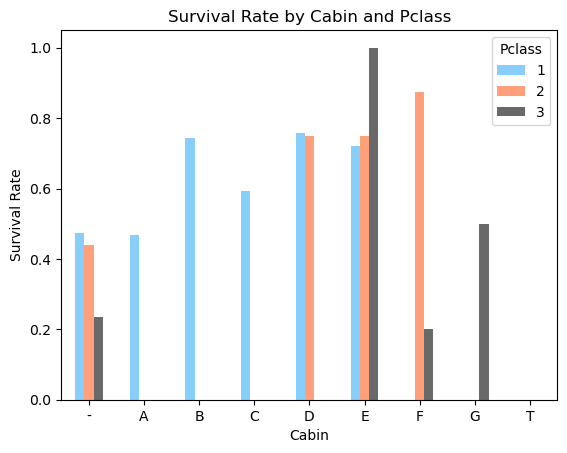

In [47]:
survival_rate = cabin_class_survived.groupby(['Cabin', 'Pclass'])['Survived'].mean().unstack()

# pick colors for the bars
colors = ['#87cefa', '#FFA07A', '#696969']

# Plotting the survival rate
survival_rate.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Cabin')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Cabin and Pclass')

# Modifying the x-axis tick labels
plt.xticks(rotation=0)

# Displaying the chart
plt.show()


As above shows, first class has the highest survival chance and for null cabin record (majority of them are third class) has the lowest survival chance

### Embarked
* Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [48]:
train_df[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=True)

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [49]:
train_df[['Embarked', 'Pclass', 'Survived']].groupby('Pclass')['Embarked'].value_counts().to_frame()

Embarked
Pclass Embarked          
1      S              127
       C               85
       Q                2
2      S              164
       C               17
       Q                3
3      S              353
       Q               72
       C               66

In [50]:
embarked_counts = train_df[['Embarked', 'Pclass', 'Survived']].groupby('Pclass')['Embarked'].value_counts().to_frame()

# Calculating the mean of 'Survived' by Pclass and Embarked
survived_mean = train_df.groupby(['Pclass', 'Embarked'])['Survived'].mean().to_frame()

# Renaming the column to 'count'
embarked_counts = embarked_counts.rename(columns={'Embarked': 'count'})

# Renaming the column to 'Survived Mean'
survived_mean.columns = ['Survived Mean']

# Concatenating the two DataFrames
embarked_counts = pd.concat([embarked_counts, survived_mean], axis=1)

# Displaying the DataFrame
print(embarked_counts)


                 count  Survived Mean
Pclass Embarked                      
1      S           127       0.582677
       C            85       0.694118
       Q             2       0.500000
2      S           164       0.463415
       C            17       0.529412
       Q             3       0.666667
3      S           353       0.189802
       Q            72       0.375000
       C            66       0.378788


color: https://www.palcon.nl/colors/Color-combinator.htm

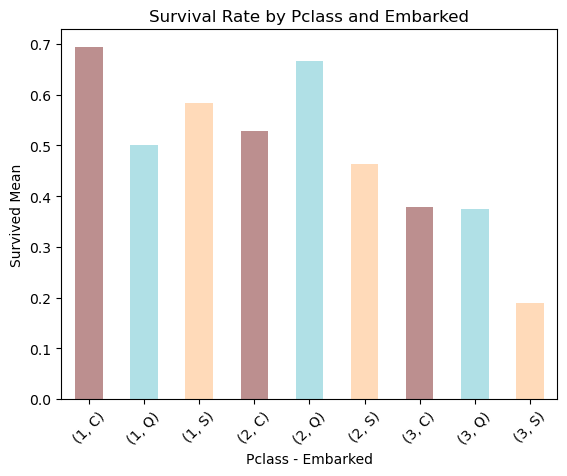

In [51]:
import matplotlib.pyplot as plt

# Calculate the count and mean of 'Survived' by Pclass and Embarked
embarked_counts = train_df[['Embarked', 'Pclass', 'Survived']].groupby(['Pclass', 'Embarked']).agg({'Embarked': 'count', 'Survived': 'mean'})

embarked_counts = embarked_counts.rename(columns={'Embarked': 'Count', 'Survived': 'Survived Mean'})


# Define the colors for each 'Embarked' category within each 'Pclass'
colors = ['#BC8F8F', '#B0E0E6', '#FFDAB9']  # Pink, Orange, Purple for fun

# Plotting the bar chart with color differentiation
ax = embarked_counts['Survived Mean'].plot(kind='bar', color=colors, legend=False)

# Adding labels and title
plt.xlabel('Pclass - Embarked')

plt.ylabel('Survived Mean')

plt.title('Survival Rate by Pclass and Embarked')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the chart
plt.show()


The Cherbourg has highest survival chance in P1, Q has highest survival chance in P2

### Name by title

In [52]:
title = train_df['Name'].str.split().str[1]

In [53]:
title_survied = train_df[train_df['Name'].str.contains('Mr\.|Miss\.|Mrs\.|Master\.|Dr\.|Rev\.')]

title_survied

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,S,"(20.315, 30.263]","(-0.512, 51.233]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(30.263, 40.21]","(51.233, 102.466]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,S,"(20.315, 30.263]","(-0.512, 51.233]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,"(30.263, 40.21]","(51.233, 102.466]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,S,"(30.263, 40.21]","(-0.512, 51.233]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,-,S,"(20.315, 30.263]","(-0.512, 51.233]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,"(10.368, 20.315]","(-0.512, 51.233]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,-,S,NaN,"(-0.512, 51.233]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,"(20.315, 30.263]","(-0.512, 51.233]"


In [54]:
title_survied['title'] = title_survied['Name'].str.split().str[1]

title_survied

/var/folders/7y/pry034n17xs1w4n0rfm69zh00000gn/T/ipykernel_25299/3740681305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_survied['title'] = title_survied['Name'].str.split().str[1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_group,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,S,"(20.315, 30.263]","(-0.512, 51.233]",Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(30.263, 40.21]","(51.233, 102.466]",Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,S,"(20.315, 30.263]","(-0.512, 51.233]",Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,"(30.263, 40.21]","(51.233, 102.466]",Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,S,"(30.263, 40.21]","(-0.512, 51.233]",Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,-,S,"(20.315, 30.263]","(-0.512, 51.233]",Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,"(10.368, 20.315]","(-0.512, 51.233]",Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,-,S,NaN,"(-0.512, 51.233]",Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,"(20.315, 30.263]","(-0.512, 51.233]",Mr.


In [55]:
title_survied['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Rev.', 'Billiard,',
       'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y', 'Steen,',
       'Carlo,', 'Impe,', 'Messemaeker,', 'Velde,', 'Shawah,',
       'Melkebeke,', 'Cruyssen,'], dtype=object)

In [56]:
title_list = ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.']

title_survied = title_survied[title_survied['title'].isin(title_list)]

In [57]:
title_survied = title_survied[['title', 'Survived']].groupby('title').mean().sort_values(by='Survived', ascending=True)

title_survied

,Survived
title,
Rev.,0.000000
Mr.,0.157371
Dr.,0.428571
Master.,0.575000
Miss.,0.703911
Mrs.,0.801653


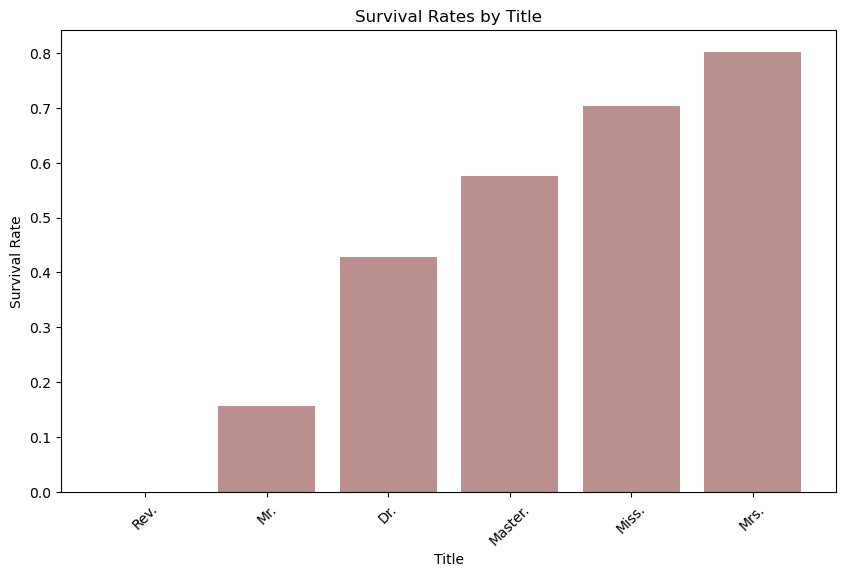

In [58]:
# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(title_survied.index.astype(str), title_survied['Survived'], color = '#BC8F8F')

# Customize the plot
plt.xlabel('Title')

plt.ylabel('Survival Rate')

plt.title('Survival Rates by Title')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Display the plot
plt.show()

Mrs. has the highest survival chance

# Data Cleaning

Survived is the one we want to predict, so isolate that from train_df instead.

In [59]:
label_y = train_df['Survived'] # this is the answer when testing the model

label_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [60]:
train_df = train_df.drop('Survived', axis = 1)

* Concat test_df to train_df for data cleaning and EDA, then seperate two df afterwards
* slicing: https://levelup.gitconnected.com/how-to-slice-a-dataframe-in-pandas-884bd8b298a6

In [61]:
#train_df.insert(0, "indexforslice", 'train')

#train_df.head(2)

In [62]:
train_df['indexforslice'] = 'train'

train_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_group,indexforslice
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,S,"(20.315, 30.263]","(-0.512, 51.233]",train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(30.263, 40.21]","(51.233, 102.466]",train


In [63]:
#test_df.insert(0, "indexforslice", 'test')

#test_df.head(2)

In [64]:
test_df['indexforslice'] = 'test'

test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indexforslice
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test


In [65]:
#concat 2 df vertically
all_df = pd.concat([train_df, test_df], axis=0)

all_df.shape

(1309, 14)

In [66]:
all_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_group,indexforslice
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,S,"(20.315, 30.263]","(-0.512, 51.233]",train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(30.263, 40.21]","(51.233, 102.466]",train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,S,"(20.315, 30.263]","(-0.512, 51.233]",train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,"(30.263, 40.21]","(51.233, 102.466]",train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,S,"(30.263, 40.21]","(-0.512, 51.233]",train


In [67]:
all_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Name has duplicates

In [68]:
all_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked,indexforslice
count,1309,1309,1309,982,1307,1309
unique,1307,2,929,83,3,2
top,"Connolly, Miss. Kate",male,CA. 2343,-,S,train
freq,2,843,11,687,914,891


Seems like two persons have same name since no duplicates

In [69]:
all_df[all_df['Name'].duplicated()] # result shows not the same person

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_group,indexforslice
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,NaN,test
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,test


In [70]:
all_df.duplicated().sum()

0

In [71]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    1309 non-null   int64   
 1   Pclass         1309 non-null   int64   
 2   Name           1309 non-null   object  
 3   Sex            1309 non-null   object  
 4   Age            1046 non-null   float64 
 5   SibSp          1309 non-null   int64   
 6   Parch          1309 non-null   int64   
 7   Ticket         1309 non-null   object  
 8   Fare           1308 non-null   float64 
 9   Cabin          982 non-null    object  
 10  Embarked       1307 non-null   object  
 11  Age_Group      714 non-null    category
 12  Fare_group     891 non-null    category
 13  indexforslice  1309 non-null   object  
dtypes: category(2), float64(2), int64(4), object(6)
memory usage: 137.0+ KB


In [72]:
all_df.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age              263
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin            327
Embarked           2
Age_Group        595
Fare_group       418
indexforslice      0
dtype: int64

## Add/Drop col

### drop Passengerid

In [73]:
all_df = all_df.drop(['PassengerId'], axis = 1)

In [74]:
all_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_group,indexforslice
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,S,"(20.315, 30.263]","(-0.512, 51.233]",train
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(30.263, 40.21]","(51.233, 102.466]",train
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,S,"(20.315, 30.263]","(-0.512, 51.233]",train
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,"(30.263, 40.21]","(51.233, 102.466]",train
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,S,"(30.263, 40.21]","(-0.512, 51.233]",train


In [75]:
all_df['Fam'] = all_df['SibSp'] + all_df['Parch']

all_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Fare_group,indexforslice,Fam
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,S,"(20.315, 30.263]","(-0.512, 51.233]",train,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,"(30.263, 40.21]","(51.233, 102.466]",train,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,S,"(20.315, 30.263]","(-0.512, 51.233]",train,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,"(30.263, 40.21]","(51.233, 102.466]",train,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,S,"(30.263, 40.21]","(-0.512, 51.233]",train,0


### drop sibsp, parch

In [76]:
all_df = all_df.drop(['SibSp', 'Parch'], axis = 1)

### drop ticket

In [77]:
all_df = all_df.drop(['Ticket'], axis = 1)

### drop age group/fare group created earlier

In [78]:
all_df = all_df.drop(['Age_Group', 'Fare_group'], axis = 1)

### Change all cabin into letter only

In [79]:
all_df['Cabin'] = all_df['Cabin'].str[0]

all_df['Cabin'] = all_df['Cabin'].fillna('-')

all_df.tail()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,indexforslice,Fam
413,3,"Spector, Mr. Woolf",male,NaN,8.0500,-,S,test,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,C,C,test,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,-,S,test,0
416,3,"Ware, Mr. Frederick",male,NaN,8.0500,-,S,test,0
417,3,"Peter, Master. Michael J",male,NaN,22.3583,-,C,test,2


Extrat title from name

In [80]:
all_df['title'] = all_df['Name'].str.split().str[1]

all_df.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,indexforslice,Fam,title
0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,-,S,train,1,Mr.
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,C,train,1,Mrs.
2,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,-,S,train,0,Miss.
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C,S,train,1,Mrs.
4,3,"Allen, Mr. William Henry",male,35.0,8.0500,-,S,train,0,Mr.


In [81]:
all_df['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Planke,', 'Don.', 'Rev.',
       'Billiard,', 'der', 'Walle,', 'Dr.', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme.', 'Impe,', 'Ms.', 'Major.', 'Gordon,',
       'Messemaeker,', 'Mlle.', 'Col.', 'Capt.', 'Velde,', 'the',
       'Shawah,', 'Jonkheer.', 'Melkebeke,', 'Cruyssen,', 'Khalil,',
       'Palmquist,', 'Brito,'], dtype=object)

In [82]:
title_list = ['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.']

all_df['title'] = all_df['title'].apply(lambda x: 'others' if x not in title_list else x)

all_df['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'others', 'Rev.', 'Dr.'],
      dtype=object)

In [83]:
#drop Name col
all_df = all_df.drop(['Name'], axis = 1)

## Null 
* Age, Fare, Embarked, Cabin  

### replace null in Age by mode value 
* since drop the data will cause huge loss of data

In [84]:
all_df['Age'].isnull().sum()

263

In [85]:
all_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [86]:
import statistics
#filter out null before calculating mode
not_null = all_df[all_df['Age'].notnull()]
not_null

,Pclass,Sex,Age,Fare,Cabin,Embarked,indexforslice,Fam,title
0,3,male,22.0,7.2500,-,S,train,1,Mr.
1,1,female,38.0,71.2833,C,C,train,1,Mrs.
2,3,female,26.0,7.9250,-,S,train,0,Miss.
3,1,female,35.0,53.1000,C,S,train,1,Mrs.
4,3,male,35.0,8.0500,-,S,train,0,Mr.
...,...,...,...,...,...,...,...,...,...
409,3,female,3.0,13.7750,-,S,test,2,Miss.
411,1,female,37.0,90.0000,C,Q,test,1,Mrs.
412,3,female,28.0,7.7750,-,S,test,0,Miss.
414,1,female,39.0,108.9000,C,C,test,0,others


In [87]:
not_null['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [88]:
#mode_age = not_null['Age'].mode()

In [89]:
#mode_age.dtype

In [90]:
#all_df['Age'].fillna(mode_age).isnull().sum()

In [91]:
#all_df['Age'].fillna(24.0).isnull().sum()

In [92]:
all_df['Age'] = all_df['Age'].fillna(24.0)

In [93]:
all_df['Age'].isnull().sum()

0

### replace null in Fare by mean

In [94]:
all_df['Fare'].isnull().sum()

1

In [95]:
# only one null, replace by mean

not_null = all_df.loc[all_df['Fare'].notnull(), 'Fare']

mean = not_null.mean()

all_df['Fare'] = all_df['Fare'].fillna(mean)

In [96]:
not_null

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 1308, dtype: float64

In [97]:
all_df['Fare'].isnull().sum()

0

### replace null in Embarked based on pclass

In [98]:
all_df['Embarked'].isnull().sum()

2

In [99]:
# check the nulls
all_df[all_df['Embarked'].isnull()]

,Pclass,Sex,Age,Fare,Cabin,Embarked,indexforslice,Fam,title
61,1,female,38.0,80.0,B,NaN,train,0,Miss.
829,1,female,62.0,80.0,B,NaN,train,0,Mrs.


In [100]:
# the most common Embarked from P1 is Southampton (check Embarked section under feature of survival chance), in here manually fill them
all_df['Embarked'] = all_df['Embarked'].fillna('S')

all_df['Embarked'].isnull().sum()

0

### replace null in cabin by the most common cabin category


In [101]:
# before this, we already replace null by '-', 0 is within our expectation
all_df['Cabin'].isnull().sum()

0

In [102]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         1309 non-null   int64  
 1   Sex            1309 non-null   object 
 2   Age            1309 non-null   float64
 3   Fare           1309 non-null   float64
 4   Cabin          1309 non-null   object 
 5   Embarked       1309 non-null   object 
 6   indexforslice  1309 non-null   object 
 7   Fam            1309 non-null   int64  
 8   title          1309 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 102.3+ KB


# Turn each feature into numeric for ML

## Splice the train and test df from all_df

In [103]:
train_ML = all_df[all_df['indexforslice'] == 'train'] 

train_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         891 non-null    int64  
 1   Sex            891 non-null    object 
 2   Age            891 non-null    float64
 3   Fare           891 non-null    float64
 4   Cabin          891 non-null    object 
 5   Embarked       891 non-null    object 
 6   indexforslice  891 non-null    object 
 7   Fam            891 non-null    int64  
 8   title          891 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 69.6+ KB


In [104]:
# drop 'indexforslice'
train_ML = train_ML.drop(['indexforslice'], axis = 1)

In [105]:
test_ML = all_df[all_df['indexforslice'] == 'test'] 

test_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    object 
 2   Age            418 non-null    float64
 3   Fare           418 non-null    float64
 4   Cabin          418 non-null    object 
 5   Embarked       418 non-null    object 
 6   indexforslice  418 non-null    object 
 7   Fam            418 non-null    int64  
 8   title          418 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 32.7+ KB


In [106]:
# drop 'indexforslice'
test_ML = test_ML.drop(['indexforslice'], axis = 1)

## Change each categorical feature into number

### Pclass

In [107]:
# take a look of the df, and deal with train_ML and test_ML
train_ML.head(2)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Fam,title
0,3,male,22.0,7.2500,-,S,1,Mr.
1,1,female,38.0,71.2833,C,C,1,Mrs.


It's numerical in pclass, there's no need to convert them into number

### Sex

In [108]:
sex = {'male':0, 'female':1}

train_ML['Sex'] = train_ML['Sex'].map(sex)

test_ML['Sex'] = test_ML['Sex'].map(sex)

train_ML['Sex'].head(2)

0    0
1    1
Name: Sex, dtype: int64

### Age

In [109]:
train_ML['Age'].dtype

dtype('float64')

In [110]:
# convert into int
train_ML['Age'] = train_ML['Age'].astype(int)

test_ML['Age'] = test_ML['Age'].astype(int)

In [111]:
# Group 'Age' column into 10 groups
age = ['0', '1', '2', '3', '4', '5', '6', '7']

train_ML['Age_Group'] = pd.cut(train_ML['Age'], bins = 8, labels = age)

test_ML['Age_Group'] = pd.cut(test_ML['Age'], bins = 8, labels = age)

In [112]:
train_ML['Age_Group'].unique()

['2', '3', '5', '0', '1', '6', '4', '7']
Categories (8, object): ['0' < '1' < '2' < '3' < '4' < '5' < '6' < '7']

In [113]:
train_ML.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Fam,title,Age_Group
0,3,0,22,7.2500,-,S,1,Mr.,2
1,1,1,38,71.2833,C,C,1,Mrs.,3
2,3,1,26,7.9250,-,S,0,Miss.,2
3,1,1,35,53.1000,C,S,1,Mrs.,3
4,3,0,35,8.0500,-,S,0,Mr.,3


In [114]:
test_ML.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Fam,title,Age_Group
0,3,0,34,7.8292,-,Q,0,Mr.,3
1,3,1,47,7.0000,-,S,1,Mrs.,4
2,2,0,62,9.6875,-,Q,0,Mr.,6
3,3,0,27,8.6625,-,S,0,Mr.,2
4,3,1,22,12.2875,-,S,2,Mrs.,2


In [115]:
# drop Age col
train_ML = train_ML.drop(['Age'], axis = 1)

test_ML = test_ML.drop(['Age'], axis = 1)

### Fare

It's numerical but need to do the same thing by cut function as Age, pd.qcut() is used in here bc Fare has serious skew

In [116]:
fare = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

train_ML['Fare'] = pd.qcut(train_ML['Fare'], q = 10, labels = fare) # the q parameter is set to 10 to indicate that we want to create 10 equal-sized bins.

test_ML['Fare'] = pd.qcut(test_ML['Fare'], q = 10, labels = fare)

In [117]:
train_ML.head()

,Pclass,Sex,Fare,Cabin,Embarked,Fam,title,Age_Group
0,3,0,0,-,S,1,Mr.,2
1,1,1,8,C,C,1,Mrs.,3
2,3,1,2,-,S,0,Miss.,2
3,1,1,8,C,S,1,Mrs.,3
4,3,0,2,-,S,0,Mr.,3


### Cabin

In [118]:
train_ML['Cabin'].unique()

array(['-', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [119]:
cabin = {'-':0, 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}

train_ML['Cabin'] = train_ML['Cabin'].map(cabin)

test_ML['Cabin'] = test_ML['Cabin'].map(cabin)

train_ML['Cabin'].head(2)

0    0
1    3
Name: Cabin, dtype: int64

### Embarked

In [120]:
train_ML['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [121]:
embarked = {'S':0, 'C':1, 'Q':2 }

train_ML['Embarked'] = train_ML['Embarked'].map(embarked)

test_ML['Embarked'] = test_ML['Embarked'].map(embarked)

train_ML['Embarked'].head(2)

0    0
1    1
Name: Embarked, dtype: int64

### Fam

It's numerical in pclass, there's no need to convert them into number

### title

In [122]:
train_ML['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'others', 'Rev.', 'Dr.'],
      dtype=object)

In [123]:
title = {'Mr.':0, 'Mrs.':1, 'Miss.':2, 'Master.':3, 'others':4, 'Rev.':5, 'Dr.':6 }

train_ML['title'] = train_ML['title'].map(title)

test_ML['title'] = test_ML['title'].map(title)

train_ML['title'].head(2)

0    0
1    1
Name: title, dtype: int64

Now check the final result before applying ML model

In [124]:
train_ML.head()

,Pclass,Sex,Fare,Cabin,Embarked,Fam,title,Age_Group
0,3,0,0,0,0,1,0,2
1,1,1,8,3,1,1,1,3
2,3,1,2,0,0,0,2,2
3,1,1,8,3,0,1,1,3
4,3,0,2,0,0,0,0,3


In [125]:
test_ML.head()

,Pclass,Sex,Fare,Cabin,Embarked,Fam,title,Age_Group
0,3,0,2,0,2,0,0,3
1,3,1,0,0,0,1,1,4
2,2,0,3,0,2,0,0,6
3,3,0,3,0,0,0,0,2
4,3,1,4,0,0,2,1,2


In [126]:
train_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     891 non-null    int64   
 1   Sex        891 non-null    int64   
 2   Fare       891 non-null    category
 3   Cabin      891 non-null    int64   
 4   Embarked   891 non-null    int64   
 5   Fam        891 non-null    int64   
 6   title      891 non-null    int64   
 7   Age_Group  891 non-null    category
dtypes: category(2), int64(6)
memory usage: 51.2 KB


In [127]:
# Convert 'Fare' column to integer
train_ML['Fare'] = train_ML['Fare'].cat.codes

# Convert 'Age_Group' column to integer
train_ML['Age_Group'] = train_ML['Age_Group'].cat.codes

In [128]:
# Convert 'Fare' column to integer
test_ML['Fare'] = test_ML['Fare'].cat.codes

# Convert 'Age_Group' column to integer
test_ML['Age_Group'] = test_ML['Age_Group'].cat.codes

# ML model

In [129]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC, LinearSVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import Perceptron

from sklearn import linear_model

from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier

#from sklearn.model_selection import train_test_split 
#no need in here, we already have train_ML and test_ML provided from kaggle

In [130]:
X_train = train_ML

Y_train = label_y # which is train_df['Survived']

X_test  = test_ML.copy() 

## LogisticRegression

In [131]:
lre = LogisticRegression(solver='lbfgs')

lre.fit(X_train, Y_train)

Y_pred = lre.predict(X_test)

acc_log = round(lre.score(X_train, Y_train) * 100, 1)#acc for acuracy

## Linear Support Vector Machine

In [132]:
lsvc = LinearSVC()

lsvc.fit(X_train, Y_train)

Y_pred = lsvc.predict(X_test)

acc_linear_svc = round(lsvc.score(X_train, Y_train) * 100, 1)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## RandomForest

In [133]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test) #Y_prediction not y_pred for later exploration

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 1)

## K Nearest Neighbor

In [134]:
knn = KNeighborsClassifier(n_neighbors = 3) 

knn.fit(X_train, Y_train)  

Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, Y_train) * 100, 1)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

## Gaussian Naive Bayes

In [135]:
gaussian = GaussianNB() 

gaussian.fit(X_train, Y_train)  

Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 1)

## Perceptron

In [136]:
perceptron = Perceptron(max_iter=50)

perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 1)

## Stochastic Gradient Descent (SGD)

In [137]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 1)

## Decision Tree

In [138]:
decision_tree = DecisionTreeClassifier() 

decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 1)

In [139]:
results = pd.DataFrame({
    'ML Model': ['Logistic Regression',
                 'Support Vector Machines',
                 'Random Forest',
                 'K Nearest Neighbor', 
                 'Gaussian Naive Bayes',
                 'Perceptron', 
                 'Stochastic Gradient Decent', 
                 'Decision Tree'],
    'result': [acc_log,
               acc_linear_svc,
               acc_random_forest,
               acc_knn,
               acc_gaussian, 
               acc_perceptron, 
               acc_sgd, 
               acc_decision_tree]})

result_df = results.sort_values(by = 'result', ascending = True)

result_df = result_df.set_index('result')

result_df

,ML Model
result,
76.8,Perceptron
78.3,Stochastic Gradient Decent
79.1,Gaussian Naive Bayes
80.0,Support Vector Machines
81.1,Logistic Regression
86.0,K Nearest Neighbor
92.4,Random Forest
92.4,Decision Tree


Random Forest, Decision Tree is the best

# cross validation

In [145]:
# in here, using K-Fold Cross Validation to see the result of random forest
from sklearn.model_selection import cross_val_score
import pprint

random_f = RandomForestClassifier(n_estimators = 100)

scores = cross_val_score(random_f, X_train, Y_train, cv = 10, scoring = 'accuracy') # 10 equal-sized folds


acc = {'score': scores,
       'mean':scores.mean(),
       'standard deviation': scores.std()
      }

# make output more visually appealing format
pp = pprint.PrettyPrinter()

pp.pprint(acc)


{'mean': 0.819338327091136,
 'score': array([0.78888889, 0.85393258, 0.71910112, 0.86516854, 0.83146067,
       0.83146067, 0.79775281, 0.7752809 , 0.88764045, 0.84269663]),
 'standard deviation': 0.04709938492087867}


It shows the random forest model's actual accuracy is nearly 0.82 +- 0.05

In [147]:
# in here, using K-Fold Cross Validation to see the result of Decision Tree
decision_t = DecisionTreeClassifier()

scores_dt = cross_val_score(decision_t, X_train, Y_train, cv = 10, scoring = 'accuracy') # 10 equal-sized folds


acc = {'score': scores_dt,
       'mean':scores_dt.mean(),
       'standard deviation': scores_dt.std()
      }

# make output more visually appealing format
pp = pprint.PrettyPrinter()

pp.pprint(acc)

{'mean': 0.8025468164794007,
 'score': array([0.73333333, 0.87640449, 0.70786517, 0.86516854, 0.78651685,
       0.79775281, 0.80898876, 0.7752809 , 0.88764045, 0.78651685]),
 'standard deviation': 0.05629770394155169}


It shows the Decision Tree model's actual accuracy is 0.80 +- 0.06

# Fine tune model 

In [148]:
# check the weight of each feature

In [160]:
# check feature importances
importances = random_forest.feature_importances_

#df for store result as df
imp_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# importance scores for each feature
for index, row in imp_df.iterrows():
    
    feature = row['Feature']
    
    importance = row['Importance']   

In [164]:
imp_df.sort_values(by = 'Importance', ascending = True)

,Feature,Importance
4,Embarked,0.047537
3,Cabin,0.082541
0,Pclass,0.085114
5,Fam,0.112159
7,Age_Group,0.129122
2,Fare,0.163247
1,Sex,0.187651
6,title,0.192629


## drop Embarked and train model again

In [167]:
X_train_adjust = train_ML.drop(['Embarked'], axis = 1)

Y_train_adjust = label_y # which is train_df['Survived']

X_test_adjust  = test_ML.drop(['Embarked'], axis = 1).copy() 

Throw it to model again

In [168]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train_adjust, Y_train_adjust)

Y_prediction = random_forest.predict(X_test_adjust)

random_forest.score(X_train_adjust, Y_train_adjust)

acc_random_forest = round(random_forest.score(X_train_adjust, Y_train_adjust) * 100, 1)

acc_random_forest

91.1

cross validation

In [169]:
random_f_adjust = RandomForestClassifier(n_estimators = 100)

scores_adjust = cross_val_score(random_f_adjust, X_train_adjust, Y_train_adjust, cv = 10, scoring = 'accuracy') # 10 equal-sized folds

acc_adjust = {'score': scores_adjust,
       'mean':scores_adjust.mean(),
       'standard deviation': scores_adjust.std()
      }

# make output more visually appealing format
pp = pprint.PrettyPrinter()

pp.pprint(acc_adjust)

{'mean': 0.8204619225967541,
 'score': array([0.78888889, 0.83146067, 0.69662921, 0.86516854, 0.87640449,
       0.84269663, 0.80898876, 0.79775281, 0.87640449, 0.82022472]),
 'standard deviation': 0.050844831346884715}


The mean score of adjust random forest is 0.82+-0.05, so seems like the fine tune doesn't help

# Export result for kaggel

In [170]:
kaggle_csv = pd.DataFrame({

        'PassengerId': test_df['PassengerId'],

        'Survived': Y_prediction
         })

kaggle_csv


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [171]:
#kaggle_csv.to_csv(r'/Users/lih-anhsu/Desktop/Python/kaggle_titanic_ML/titanic_submission_Anne.csv', index=False)